<a href="https://colab.research.google.com/github/zeeshansalim1234/App_Reviews_Visualizer/blob/main/App_Reviews_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing Libraries

In [8]:
!pip install google_play_scraper
!pip install sklearn
!pip install transformers requests beautifulsoup4 pandas numpy

In [1]:
!pip install torch

In [2]:
!pip install neattext

     |████████████████████████████████| 114 kB 5.3 MB/s 


# Importing Libraries

In [18]:
import transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re
import seaborn as sns
import neattext.functions as nfx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
pd.set_option('display.max_colwidth', 1000) 
import nltk
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('punkt')
nltk.download('stopwords')

from google_play_scraper.features.reviews import Sort, reviews_all, reviews
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Scrapping App Reviews from Google Play Store

In [11]:
result,continuation_token= reviews('com.ubercab',lang='en',country='us',sort=Sort.MOST_RELEVANT, count=10000)

In [ ]:
df = pd.DataFrame(result)
df

In [19]:
df_app=pd.DataFrame(np.array(df['content']),columns=['review'])
df_app

,review
0,"It used to be a great app, i used it for everything, but since drivers are just wasting your time by canceling the trips, sometimes even at the point of pick up, and its not just once but sometimes it happens to the point of not having any drivers available. The reason: they dont accept debit/credit cards anymore, just cash. And it is for every trip i request. Totally disapointed. I wont use it again! :("
1,"Painful experience. First, the app halts after every map movement when selecting location. Second, everytime it connects to a driver, driver accepts the ride and the first message of the driver is ""Where do you want to go?"" and then the driver decides whether to continue the ride or not. Sometimes we have to wait and talk to 3-4 drivers and waste 30-40 minutes before finally using the ride. This is not acceptable in any way. Why every driver wants 5-10 minutes ride? Maybe your incentives."
2,"I would say horrible customer service, but that would mean they have customer service! I waited outside for over an hour trying to reactivate my account after being told, ""since you're in an unsafe location, but currently safe, I will report your concerns and the team will be with you shortly."" After 40mins I called again and was told the same thing. What is the purpose of having a safety or emergency line when they don't help you in a safety or emergency situation?"
3,"Not sure what happened since COVID - probably 2 yrs since my last trip - but it seems in the effort to streamline, the app has become confusing: to set pick-up points, determine where the vehicles are, (ie: what the wait time is) and even the vehicle tiers have changed. I get that there are users that learn the ins and outs every time there is an app update, but if you want to attract more casual users, stop changing the interface. After 10 minutes of mucking about, I just grabbed a cab."
4,Usally an ok app but twice I've had trouble with rides and have received little help. Today a driver drove to the drop off address instead of picking me up and when I called her all she said to do was cancel it. Contacted customer service and they refuse to give me my money back even though I was never in the car. Most of the time its 5 stars but the customer service is a 1 if I could give it 0 stars I would .
...,...
9995,"Every time I schedule in advance my driver is a minimum of 30 minutes late. I schedule to arrive at my destination on time, two stars for lack of reliability."
9996,"There are no ads within applications, wait yes there is to tailored individual taste. The app is simple easy for anyone ,"
9997,Drivers can fail to find you and still charge you. Using alternatives from now on.
9998,Absolutely horrible Wait 29 mins for a car that never shows up. Tried 3 times was left stranded.


# Processing the Data

In [28]:
df_app['review']=df_app['review'].apply(nfx.remove_hashtags).apply(nfx.remove_emojis).apply(nfx.remove_urls).apply(nfx.remove_userhandles).apply(nfx.remove_multiple_spaces).apply(nfx.remove_punctuations)

# Negative Reviews Ectraction(Sentiment Analysis) with BERT

In [29]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [33]:
def get_sentiment_score(text):
  tokens = tokenizer.encode(text, return_tensors='pt')
  result= model(tokens)
  return int(torch.argmax(result.logits))+1

df_app

,review
0,It used to be a great app i used it for everything but since drivers are just wasting your time by canceling the trips sometimes even at the point of pick up and its not just once but sometimes it happens to the point of not having any drivers available The reason: they dont accept debit/credit cards anymore just cash And it is for every trip i request Totally disapointed I wont use it again :(
1,Painful experience First the app halts after every map movement when selecting location Second everytime it connects to a driver driver accepts the ride and the first message of the driver is Where do you want to go and then the driver decides whether to continue the ride or not Sometimes we have to wait and talk to 34 drivers and waste 3040 minutes before finally using the ride This is not acceptable in any way Why every driver wants 510 minutes ride Maybe your incentives
2,I would say horrible customer service but that would mean they have customer service I waited outside for over an hour trying to reactivate my account after being told since youre in an unsafe location but currently safe I will report your concerns and the team will be with you shortly After 40mins I called again and was told the same thing What is the purpose of having a safety or emergency line when they dont help you in a safety or emergency situation
3,Not sure what happened since COVID probably 2 yrs since my last trip but it seems in the effort to streamline the app has become confusing: to set pickup points determine where the vehicles are (ie: what the wait time is) and even the vehicle tiers have changed I get that there are users that learn the ins and outs every time there is an app update but if you want to attract more casual users stop changing the interface After 10 minutes of mucking about I just grabbed a cab
4,Usally an ok app but twice Ive had trouble with rides and have received little help Today a driver drove to the drop off address instead of picking me up and when I called her all she said to do was cancel it Contacted customer service and they refuse to give me my money back even though I was never in the car Most of the time its 5 stars but the customer service is a 1 if I could give it 0 stars I would
...,...
9995,Every time I schedule in advance my driver is a minimum of 30 minutes late I schedule to arrive at my destination on time two stars for lack of reliability
9996,There are no ads within applications wait yes there is to tailored individual taste The app is simple easy for anyone
9997,Drivers can fail to find you and still charge you Using alternatives from now on
9998,Absolutely horrible Wait 29 mins for a car that never shows up Tried 3 times was left stranded


In [34]:
#df_result.insert(1, "sentiment_scores", df_result['processed_text'].apply(lambda x: sentiment_score(x[:512])), True)
df_app['sentiment']=df_app['review'].apply(lambda x: get_sentiment_score(x[:512]))

In [36]:
negative_reviews = df_app[df_app['sentiment']<=3]['review']
negative_reviews

0                                                                                          It used to be a great app i used it for everything but since drivers are just wasting your time by canceling the trips sometimes even at the point of pick up and its not just once but sometimes it happens to the point of not having any drivers available The reason: they dont accept debit/credit cards anymore just cash And it is for every trip i request Totally disapointed I wont use it again :(
1          Painful experience First the app halts after every map movement when selecting location Second everytime it connects to a driver driver accepts the ride and the first message of the driver is Where do you want to go and then the driver decides whether to continue the ride or not Sometimes we have to wait and talk to 34 drivers and waste 3040 minutes before finally using the ride This is not acceptable in any way Why every driver wants 510 minutes ride Maybe your incentives
2                     

In [50]:
df_app=df_app.drop_duplicates()
df_negative=pd.DataFrame(np.array(negative_reviews),columns=['processed_review'])

# Topic Modelling with LDA

In [51]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
vectorizer = cv.fit_transform(df_negative['processed_review'])

In [54]:
LDA = LatentDirichletAllocation(n_components=3,random_state=1)
LDA.fit(vectorizer)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=4, n_jobs=None,
                          perp_tol=0.1, random_state=1, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [129]:
for index,topic in enumerate(LDA.components_):
    print(f'topic #{index} : ')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-20:]])

topic #0 : 
['doesnt', 'said', 'charged', 'tried', 'got', 'phone', 'didnt', 'number', 'issue', 'way', 'contact', 'use', 'help', 'support', 'service', 'customer', 'ride', 'driver', 'app', 'uber']
topic #1 : 
['charge', 'trip', 'ive', 'im', 'money', 'work', 'dont', 'payment', 'using', 'used', 'prices', 'time', 'just', 'account', 'card', 'use', 'ride', 'price', 'uber', 'app']
topic #2 : 
['20', 'mins', '10', 'away', 'rides', 'times', 'dont', 'service', 'trip', 'just', 'waiting', 'app', 'ride', 'wait', 'minutes', 'time', 'uber', 'cancel', 'driver', 'drivers']
topic #3 : 
['payment', 'ask', 'location', 'booking', 'destination', 'experience', 'pay', 'dont', 'cab', 'customer', 'time', 'worst', 'service', 'drivers', 'trip', 'cancel', 'app', 'uber', 'ride', 'driver']


In [130]:
topic_results = LDA.transform(vectorizer)
df_topic_results = pd.DataFrame(topic_results, columns=[
'0_Service/App related Issues',
'1_Payment Issues' ,
'2_Driver/Ride Issues'            ,
'3_Booking/Cancellation Issues'  , 
])
df_result = pd.merge(df_negative, df_topic_results,  how='inner', left_index=True, right_index=True )
df_result.to_csv('app_reviews_bms.csv')

# Final Topics-Reviews Visualization

In [ ]:
df_visualization= pd.read_csv("app_reviews_bms.csv")
df_visualization

In [109]:
df_visualization['0_Service/App related Issues']=round(df_visualization['0_Service/App related Issues']*100,2)
df_visualization['1_Payment Issues']=round(df_visualization['1_Payment Issues']*100,2)
df_visualization['2_Driver/Ride Issues']=round(df_visualization['2_Driver/Ride Issues']*100,2)
df_visualization['3_Booking/Cancellation Issues']=round(df_visualization['3_Booking/Cancellation Issues']*100,2)

In [132]:
df_visualization['0_Service/App related Issues']=df_visualization['0_Service/App related Issues'].astype(str)+"%"
df_visualization['1_Payment Issues']=df_visualization['1_Payment Issues'].astype(str)+"%"
df_visualization['2_Driver/Ride Issues']=df_visualization['2_Driver/Ride Issues'].astype(str)+"%"
df_visualization['3_Booking/Cancellation Issues']=df_visualization['3_Booking/Cancellation Issues'].astype(str)+"%"


In [ ]:
df_visualization

In [ ]:
df_list=df_visualization.values.tolist()
df_list

In [143]:
counter0=0
counter1=0
counter2=0
counter3=0

for i in range(0,len(df_list)):
  temp=[float(df_list[i][2][:-1]),float(df_list[i][3][:-1]),float(df_list[i][4][:-1]),float(df_list[i][5][:-1])]
  if(i==0):
    print(temp)
  if(max(temp)==float(df_list[i][2][:-1])):
    counter0+=1
  elif(max(temp)==float(df_list[i][3][:-1])):
    counter1+=1
  elif(max(temp)==float(df_list[i][4][:-1])):
    counter2+=1
  elif(max(temp)==float(df_list[i][5][:-1])):
    counter3+=1
  

[0.007813308914790444, 0.35668494679904755, 0.5112405870326964, 0.12426115725346565]


In [144]:
print(len(df_list))
print(counter0)
print(counter1)
print(counter2)
print(counter3)

8163
1516
1596
2220
2831


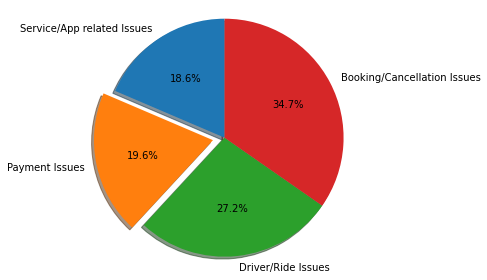

In [146]:
# Pie chart
labels = ['Service/App related Issues',
'Payment Issues' ,
'Driver/Ride Issues'            ,
'Booking/Cancellation Issues']
sizes = [counter0, counter1, counter2, counter3]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.1, 0, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

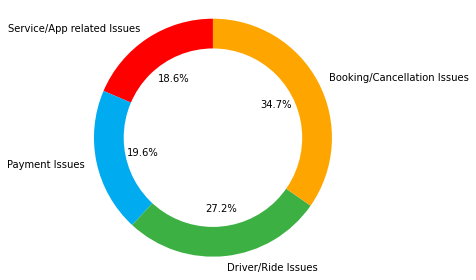

In [156]:
import matplotlib.pyplot as plt
# Pie chart
labels = ['Service/App related Issues',
'Payment Issues' ,
'Driver/Ride Issues'            ,
'Booking/Cancellation Issues']
sizes = [counter0, counter1, counter2, counter3]
#colors
colors = ['#FF0000','#00ABF0','#3CB043','#FFA500']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

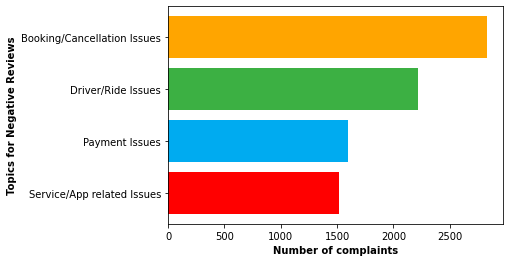

In [179]:
plt.barh(labels, sizes, color=colors)
plt.xlabel("Number of complaints",fontweight ='bold')
plt.ylabel("Topics for Negative Reviews",fontweight ='bold')
plt.show()